# U-2-NETp DEMONSTRATION

**Using U-2-NETp for :**
 - **Background Removal**
 - **Bounding Box Creation**
 - **Salient Feature Highlighting**


 U-2-NET Paper: [U2-Net: Going Deeper with Nested U-Structure for Salient Object Detection](https://arxiv.org/abs/2005.09007)

 Original Repo: [U-2-Net Github repo](https://github.com/NathanUA/U-2-Net)

References: X. Qin, Z. Zhang, C. Huang, M. Dehghan, O. R. Zaiane, and M. Jagersand, “U2-net: Going deeper with nested u-structure for salient object
detection,” Pattern Recognition, vol. 106, p. 107404, 2020

# SETUP

- Clone github repo: [https://github.com/shreyas-bk/U-2-Net](https://github.com/shreyas-bk/U-2-Net)
- Make directories for images
- Import necessary packages

Note: Uses U-2-Netp with 4.7MB weights, not U-2-Net with 176.3MB

In [1]:
#@title Run this cell for setups{display-mode: "form"}
!/usr/local/cuda/bin/nvcc --version
!git clone https://github.com/shreyas-bk/U-2-Net
%cd /content/U-2-Net
print('making images directory')
!mkdir images
print('making results directory')
!mkdir results
print('importing...')
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
print('Done!')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Cloning into 'U-2-Net'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 499 (delta 0), reused 0 (delta 0), pack-reused 496
Receiving objects: 100% (499/499), 12.38 MiB | 40.00 MiB/s, done.
Resolving deltas: 100% (224/224), done.
/content/U-2-Net
making images directory
making results directory
importing...
Done!


# UPLOAD IMAGES

In [2]:
#@title Run this cell to upload images{display-mode: "form"}
%cd /content/U-2-Net/images
uploaded = files.upload()
%cd /content/U-2-Net

/content/U-2-Net/images


Saving U_2_NETP_IMAGE1.jpg to U_2_NETP_IMAGE1.jpg
Saving U_2_NETP_IMAGE2.jpg to U_2_NETP_IMAGE2.jpg
Saving U_2_NETP_IMAGE3.jpg to U_2_NETP_IMAGE3.jpg
/content/U-2-Net


# RESULTS
 - Run u2net_test.py
 - Remove Background
 - Create Bounding Box
 - Highlight Salient Features

['/content/U-2-Net/images/U_2_NETP_IMAGE1.jpg', '/content/U-2-Net/images/U_2_NETP_IMAGE2.jpg', '/content/U-2-Net/images/U_2_NETP_IMAGE3.jpg']
...load U2NEP---4.7 MB
inferencing: U_2_NETP_IMAGE1.jpg
inferencing: U_2_NETP_IMAGE2.jpg
inferencing: U_2_NETP_IMAGE3.jpg

INPUT                                    BACKGROUND REMOVED                     BOUNDING BOX                               SALIENT MAP



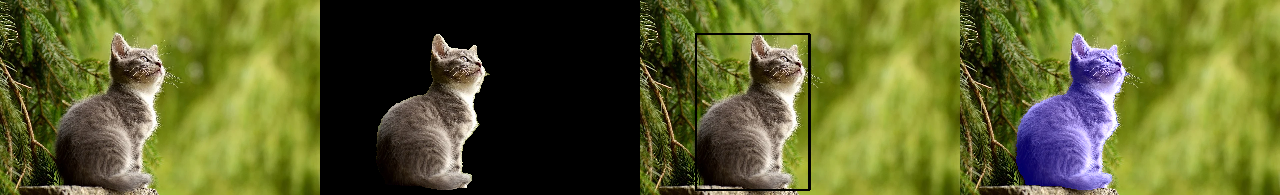


INPUT                                    BACKGROUND REMOVED                     BOUNDING BOX                               SALIENT MAP



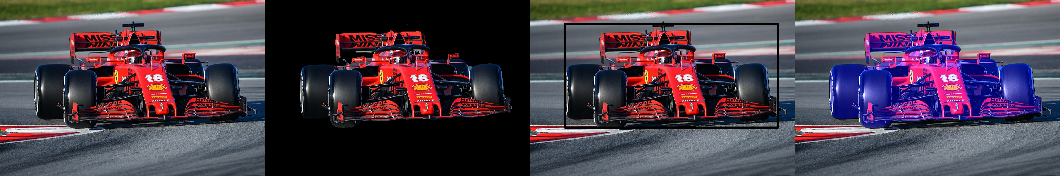


INPUT                                    BACKGROUND REMOVED                     BOUNDING BOX                               SALIENT MAP



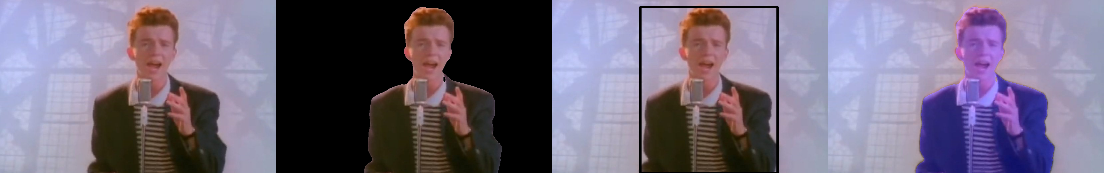

In [5]:
#@title Run this cell for results{display-mode: "form"}

# This code will be hidden when the notebook is loaded.

names = ['U_2_NETP_IMAGE1','U_2_NETP_IMAGE2','U_2_NETP_IMAGE3']
!python -W ignore u2net_test.py
for name in names:
  threshold = 0.9
  output = load_img('/content/U-2-Net/results/'+name+'.png')
  out_img = img_to_array(output)
  out_img = out_img/255
  out_img[out_img>threshold] = 1
  out_img[out_img<=threshold] = 0
  image_size = out_img.shape
  input = load_img('/content/U-2-Net/images/'+name+'.jpg', target_size=(image_size[0],image_size[1]))
  inp_img = img_to_array(input)
  inp_img = inp_img/255
  rem_back = inp_img*out_img
  rem_back = rem_back*255
  out_layer = out_img[:,:,0]
  x_starts = [np.where(out_layer[i]==1)[0][0] if len(np.where(out_layer[i]==1)[0])!=0 else out_layer.shape[0]+1 for i in range(out_layer.shape[0])]
  x_ends = [np.where(out_layer[i]==1)[0][-1] if len(np.where(out_layer[i]==1)[0])!=0 else 0 for i in range(out_layer.shape[0])]
  y_starts = [np.where(out_layer.T[i]==1)[0][0] if len(np.where(out_layer.T[i]==1)[0])!=0 else out_layer.T.shape[0]+1 for i in range(out_layer.T.shape[0])]
  y_ends = [np.where(out_layer.T[i]==1)[0][-1] if len(np.where(out_layer.T[i]==1)[0])!=0 else 0 for i in range(out_layer.T.shape[0])]
  startx = min(x_starts)
  endx = max(x_ends)
  starty = min(y_starts)
  endy = max(y_ends)
  start = (startx,starty)
  end = (endx,endy)
  box_img = inp_img.copy()
  box_img *= 255
  cv2.rectangle(box_img, start, end, (0,0,0), 5)
  sal_img = inp_img.copy()
  sal_img*=255
  out_img[out_img==1] = 100
  sal_img[:,:,2] = sal_img[:,:,2]+out_img[:,:,2]
  rem_back = cv2.resize(rem_back,(int(image_size[1]/3),int(image_size[0]/3)))
  box_img = cv2.resize(box_img,(int(image_size[1]/3),int(image_size[0]/3)))
  sal_img = cv2.resize(sal_img,(int(image_size[1]/3),int(image_size[0]/3)))
  inp_img = cv2.resize(inp_img,(int(image_size[1]/3),int(image_size[0]/3)))
  result = np.concatenate((inp_img*255,rem_back,box_img,sal_img),axis=1)
  result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
  print('\nINPUT                                    BACKGROUND REMOVED                     BOUNDING BOX                               SALIENT MAP\n')
  cv2_imshow(result)